# Algorytm KNN

Kroki działania algorytmu:
1. Wybór liczby sąsiadów (parametr 𝑘).
2. Obliczenie odległości między punktem testowym a wszystkimi punktami w zbiorze treningowym.
3. Wybranie 𝑘 najbliższych sąsiadów.
4. Klasyfikacja - przypisanie klasy na podstawie większości głosów sąsiadów.

In [21]:
import math
import random
import numpy as np

import matplotlib.pyplot as plt

In [22]:
def wizualizacja(X_train, y_train, X_test = None, y_pred = None):
    plt.figure(figsize=(10, 6))
    for i, point in enumerate(X_train):
        if y_train[i] == 0:
            plt.scatter(point[0], point[1], color='blue', alpha=0.6, label='Klasa 0' if i == 0 else "")
        else:
            plt.scatter(point[0], point[1], color='green', alpha=0.6, label='Klasa 1' if i == 50 else "")
    
    if X_test is not None:
        for i, point in enumerate(X_test):
            if y_pred[i] == 0:
                plt.scatter(point[0], point[1], color='blue', marker='X', s=100, label='Klasa 0 (test)' if i == 0 else "")
            else:
                plt.scatter(point[0], point[1], color='green', marker='X', s=100, label='Klasa 1 (test)' if i == 0 else "")

    plt.title("Wizualizacja danych treningowych i testowych z algorytmem KNN", fontsize=15)
    plt.xlabel("Cecha 1")
    plt.ylabel("Cecha 2")
    plt.legend()
    plt.grid(True)
    plt.show()

## Generowanie danych

In [23]:
random.seed(0)
X_train = [[random.gauss(2, 1), random.gauss(2, 1)] for _ in range(50)] + \
          [[random.gauss(6, 1), random.gauss(6, 1)] for _ in range(50)]
y_train = [0] * 50 + [1] * 50

X_test = [[4, 4], [5, 5], [2, 6], [8, 3]]

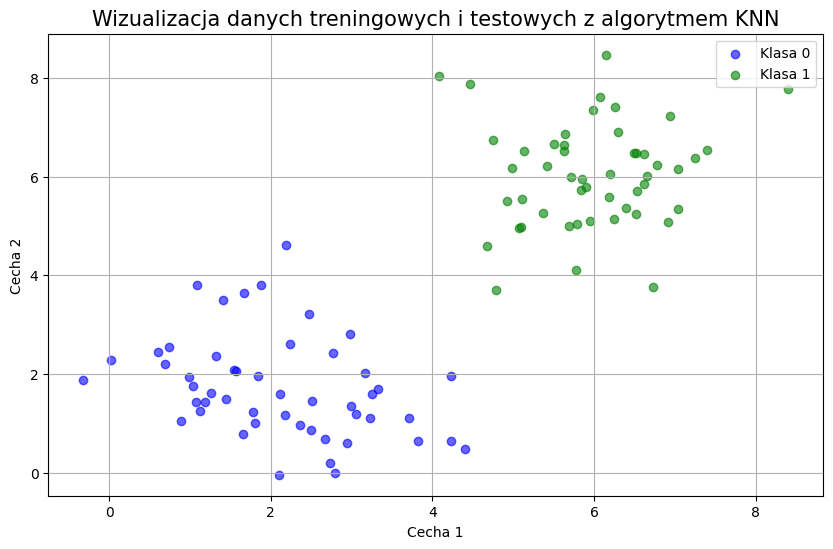

In [24]:
wizualizacja(X_train, y_train)

# Algorytm KNN

In [25]:
k = 5 # parametr k testowy

In [26]:
# funkcja liczenia odleglosci miedzy punktami X_test i X_train
def odleglosc_miedzy_punktami(xy1, xy2):
    return math.sqrt((xy1[0] - xy2[0]) ** 2 + (xy1[1] - xy2[1]) ** 2)

In [27]:
# wybranie najblizszych sasiadow dla kazdego z puntkow
odleglosci_dla_x = []
for i in range(len(X_test)):
    odleglosci = []
    for j in range(len(X_train)):
        odleglosci.append(odleglosc_miedzy_punktami(X_train[j], X_test[i]))
    odleglosci_dla_x.append(odleglosci)

In [28]:
# pobierz tablice etykiet k najblizszych punktow
etykiety_najblizszych = []
for odleglosci in odleglosci_dla_x:
    najblizsze = sorted(range(len(odleglosci)), key=lambda i: odleglosci[i])[:k]
    wynik = [y_train[i] for i in najblizsze]
    etykiety_najblizszych.append(wynik)

In [29]:
# glosowanie ktora etykiete przypisac
etykiety_przeglosowane = []
for i in range(len(etykiety_najblizszych)):
    # klasa 0 = niebieska 
    # klasa 1 = zielona
    if np.mean(etykiety_najblizszych[i]) <= 0.5:
        etykiety_przeglosowane.append(0)
    else:
        etykiety_przeglosowane.append(1)

In [30]:
print(etykiety_najblizszych) 
print(etykiety_przeglosowane)

[[1, 1, 1, 1, 0], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [1, 1, 1, 1, 1]]
[1, 1, 0, 1]


# Wizualizacja rozwiązania

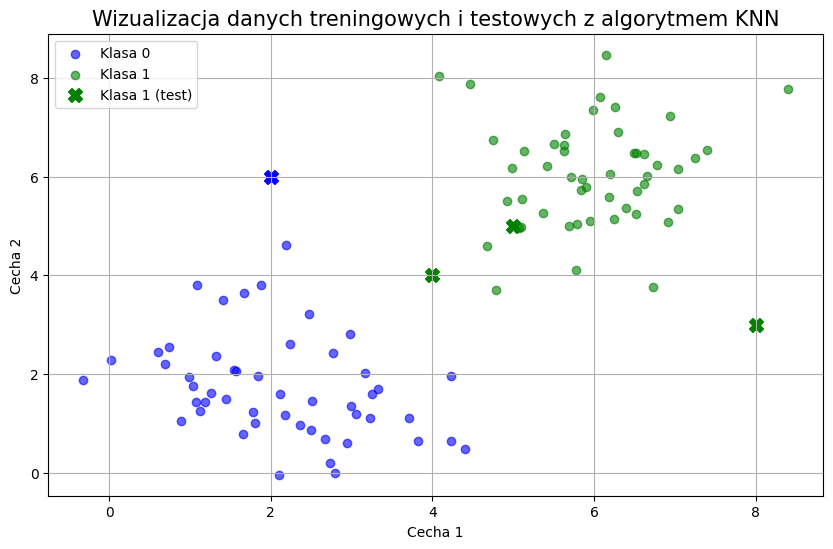

In [31]:
wynik = [0,0,1,1] # placeholder
wizualizacja(X_train, y_train, X_test, etykiety_przeglosowane)